In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

In [ ]:
%cd /content/drive/My\ Drive

/content/drive/My Drive


In [ ]:
print(tf.__version__)

2.7.0


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten,GlobalMaxPooling2D, Dropout, MaxPooling2D,GlobalAveragePooling2D,BatchNormalization,concatenate,Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import InceptionV3
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import pandas as pd
import os
from tensorflow.keras.models import load_model
from PIL import Image
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2
import itertools
import glob
from sklearn.metrics import confusion_matrix
import tensorflow as ktf

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion_matrix.png',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    tp = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    tn = cm[1,1]
    sensitivity = (tp)/(tp+fn)
    specificity = (tn)/(tn+fp)
    
    print("the sensitivity",sensitivity)
    print("the specificity",specificity)
    
    temp1 = round(((cm[0,0])/(cm[0,0]+cm[0,1]))*100)
    temp2 = round(((cm[0,1])/(cm[0,0]+cm[0,1]))*100)
    temp3 = round(((cm[1,0])/(cm[1,0]+cm[1,1]))*100)
    temp4 = round(((cm[1,1])/(cm[1,0]+cm[1,1]))*100)
    
    print(temp1,temp2,temp3,temp4)
    cm[0,0] = temp1
    cm[0,1] = temp2
    cm[1,0] = temp3
    cm[1,1] = temp4
    print(cm)
    

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    filename = "{}.png".format(title)
    plt.savefig(filename)


In [ ]:
model=load_model('/content/drive/My Drive/glaucoma_val_loss60.h5')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 lambda (Lambda)             (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                         

In [ ]:
f = open('incresnt_metrics2.txt','w')
for m in glob.glob('/content/drive/My Drive/glaucoma_val_loss60.h5'):
    f.write(m)
    f.write('\n')
    model=load_model('/content/drive/My Drive/glaucoma_val_loss60.h5')
    test_datagen = ImageDataGenerator(rescale = 1./255)
    test_set = test_datagen.flow_from_directory('/content/drive/My Drive/G_data/test',
    target_size = (256,256),
    batch_size = 1,
    class_mode = 'binary')
    eval_steps = test_set.n//test_set.batch_size
    print(eval_steps)
    count = 0
    true_count = 0
    false_count = 0
    for i in range(0,eval_steps):
        count = count+1
        x,y = test_set.next()
        true = (int)(round(y[0]))
        predict = (model.predict(x))
        predict = (int)(round(predict[0][0]))
        if(true==predict):
            true_count = true_count+1
        else:
            false_count = false_count+1
    result= "count ={0} , true_count={1} and false_count ={2}".format(count,true_count,false_count)
    f.write(result)
    f.write('\n')
    print(count,true_count,false_count)

Found 136 images belonging to 2 classes.
136
136 129 7


In [ ]:
f = open('incresnt_metrics.txt','w')
true_values = []
predict_values = []
for m in glob.glob('/content/drive/My Drive/glaucoma_val_loss60.h5'):
    f.write(m)
    f.write('\n')
    model=load_model(m)
    test_datagen = ImageDataGenerator(rescale = 1./255)
    test_set = test_datagen.flow_from_directory('/content/drive/My Drive/G_data/test',
    target_size = (256,256),
    batch_size = 1,
    class_mode = 'binary')
    eval_steps = test_set.n//test_set.batch_size
    print(eval_steps)
    count = 0
    true_count = 0
    false_count = 0
    for i in range(0,eval_steps):
        count = count+1
        x,y = test_set.next()
        true = (int)(round(y[0]))
        predict = (model.predict(x))
        predict = (int)(round(predict[0][0]))
        true_values.append(true)
        predict_values.append(predict)
        
    

Found 136 images belonging to 2 classes.
136


In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results = confusion_matrix(true_values, predict_values) 

print(results) 
print('Accuracy Score :',accuracy_score(true_values, predict_values)) 
print('Report : ')
print(classification_report(true_values, predict_values))

[[74  3]
 [ 4 55]]
Accuracy Score : 0.9485294117647058
Report : 
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        77
           1       0.95      0.93      0.94        59

    accuracy                           0.95       136
   macro avg       0.95      0.95      0.95       136
weighted avg       0.95      0.95      0.95       136



In [ ]:
results = confusion_matrix(true_values, predict_values) 

In [ ]:
print(len(true_values),len(predict_values))

136 136


Confusion matrix, without normalization
[[74  3]
 [ 4 55]]
the sensitivity 0.9487179487179487
the specificity 0.9482758620689655
96 4 7 93
[[96  4]
 [ 7 93]]


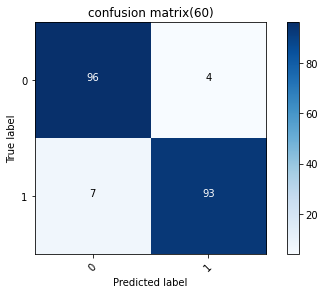

In [ ]:
cm = confusion_matrix(true_values, predict_values)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm, classes=['0', '1'],title='confusion matrix(60)')

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 lambda (Lambda)             (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                         

In [ ]:
f = open('incresnt_metrics2.txt','w')
for m in glob.glob('/content/drive/My Drive/glaucoma_val_loss60.h5'):
    f.write(m)
    f.write('\n')
    model=load_model('/content/drive/My Drive/glaucoma_val_loss60.h5')
    test_datagen = ImageDataGenerator(rescale = 1./255)
    test_set = test_datagen.flow_from_directory('/content/drive/My Drive/G_data/testt/ACRIMA',
    target_size = (256,256),
    batch_size = 1,
    class_mode = 'binary')
    eval_steps = test_set.n//test_set.batch_size
    print(eval_steps)
    count = 0
    true_count = 0
    false_count = 0
    for i in range(0,eval_steps):
        count = count+1
        x,y = test_set.next()
        true = (int)(round(y[0]))
        predict = (model.predict(x))
        predict = (int)(round(predict[0][0]))
        if(true==predict):
            true_count = true_count+1
        else:
            false_count = false_count+1
    result= "count ={0} , true_count={1} and false_count ={2}".format(count,true_count,false_count)
    f.write(result)
    f.write('\n')
    print(count,true_count,false_count)

Found 107 images belonging to 2 classes.
107
107 102 5


In [ ]:
f = open('incresnt_metrics.txt','w')
true_values = []
predict_values = []
for m in glob.glob('/content/drive/My Drive/glaucoma_val_loss60.h5'):
    f.write(m)
    f.write('\n')
    model=load_model(m)
    test_datagen = ImageDataGenerator(rescale = 1./255)
    test_set = test_datagen.flow_from_directory('/content/drive/My Drive/G_data/testt/ACRIMA',
    target_size = (256,256),
    batch_size = 1,
    class_mode = 'binary')
    eval_steps = test_set.n//test_set.batch_size
    print(eval_steps)
    count = 0
    true_count = 0
    false_count = 0
    for i in range(0,eval_steps):
        count = count+1
        x,y = test_set.next()
        true = (int)(round(y[0]))
        predict = (model.predict(x))
        predict = (int)(round(predict[0][0]))
        true_values.append(true)
        predict_values.append(predict)
        

Found 107 images belonging to 2 classes.
107


In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results = confusion_matrix(true_values, predict_values) 
  
print(results) 
print('Accuracy Score :',accuracy_score(true_values, predict_values)) 
print('Report : ')
print(classification_report(true_values, predict_values))

[[52  3]
 [ 2 50]]
Accuracy Score : 0.9532710280373832
Report : 
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        55
           1       0.94      0.96      0.95        52

    accuracy                           0.95       107
   macro avg       0.95      0.95      0.95       107
weighted avg       0.95      0.95      0.95       107



In [ ]:
results = confusion_matrix(true_values, predict_values) 

In [ ]:
print(len(true_values),len(predict_values))

107 107


Confusion matrix, without normalization
[[52  3]
 [ 2 50]]
the sensitivity 0.9629629629629629
the specificity 0.9433962264150944
95 5 4 96
[[95  5]
 [ 4 96]]


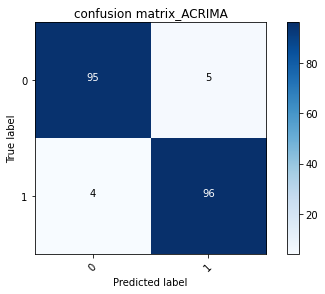

In [ ]:
cm = confusion_matrix(true_values, predict_values)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm, classes=['0', '1'],title='confusion matrix_ACRIMA')

In [ ]:
f = open('incresnt_metrics2.txt','w')
for m in glob.glob('/content/drive/My Drive/glaucoma_val_loss60.h5'):
    f.write(m)
    f.write('\n')
    model=load_model('/content/drive/My Drive/glaucoma_val_loss60.h5')
    test_datagen = ImageDataGenerator(rescale = 1./255)
    test_set = test_datagen.flow_from_directory('/content/drive/My Drive/G_data/testt/RIMONE',
    target_size = (256,256),
    batch_size = 1,
    class_mode = 'binary')
    eval_steps = test_set.n//test_set.batch_size
    print(eval_steps)
    count = 0
    true_count = 0
    false_count = 0
    for i in range(0,eval_steps):
        count = count+1
        x,y = test_set.next()
        true = (int)(round(y[0]))
        predict = (model.predict(x))
        predict = (int)(round(predict[0][0]))
        if(true==predict):
            true_count = true_count+1
        else:
            false_count = false_count+1
    result= "count ={0} , true_count={1} and false_count ={2}".format(count,true_count,false_count)
    f.write(result)
    f.write('\n')
    print(count,true_count,false_count)

Found 46 images belonging to 2 classes.
46
46 42 4


In [ ]:
f = open('incresnt_metrics.txt','w')
true_values = []
predict_values = []
for m in glob.glob('/content/drive/My Drive/glaucoma_val_loss60.h5'):
    f.write(m)
    f.write('\n')
    model=load_model(m)
    test_datagen = ImageDataGenerator(rescale = 1./255)
    test_set = test_datagen.flow_from_directory('/content/drive/My Drive/G_data/testt/RIMONE',
    target_size = (256,256),
    batch_size = 1,
    class_mode = 'binary')
    eval_steps = test_set.n//test_set.batch_size
    print(eval_steps)
    count = 0
    true_count = 0
    false_count = 0
    for i in range(0,eval_steps):
        count = count+1
        x,y = test_set.next()
        true = (int)(round(y[0]))
        predict = (model.predict(x))
        predict = (int)(round(predict[0][0]))
        true_values.append(true)
        predict_values.append(predict)

Found 46 images belonging to 2 classes.
46


In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results = confusion_matrix(true_values, predict_values) 
  
print(results) 
print('Accuracy Score :',accuracy_score(true_values, predict_values)) 
print('Report : ')
print(classification_report(true_values, predict_values))

[[17  3]
 [ 1 25]]
Accuracy Score : 0.9130434782608695
Report : 
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.89      0.96      0.93        26

    accuracy                           0.91        46
   macro avg       0.92      0.91      0.91        46
weighted avg       0.92      0.91      0.91        46



Confusion matrix, without normalization
[[17  3]
 [ 1 25]]
the sensitivity 0.9444444444444444
the specificity 0.8928571428571429
85 15 4 96
[[85 15]
 [ 4 96]]


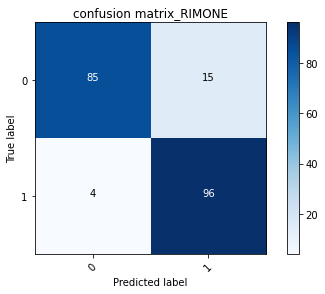

In [ ]:
cm = confusion_matrix(true_values, predict_values)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm, classes=['0', '1'],title='confusion matrix_RIMONE')